In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
jeniffer = cv.imread('a1images/jeniffer.jpg')
rgb_image = cv. cvtColor(jeniffer, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(jeniffer, cv.COLOR_BGR2HSV)

H, S, V =  cv.split(hsv_image)


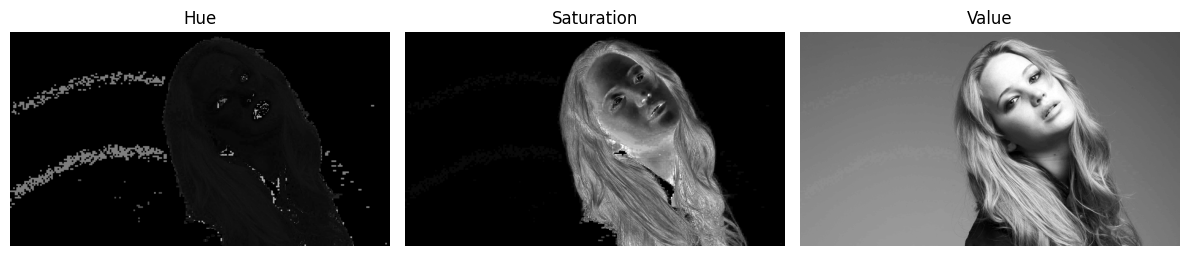

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

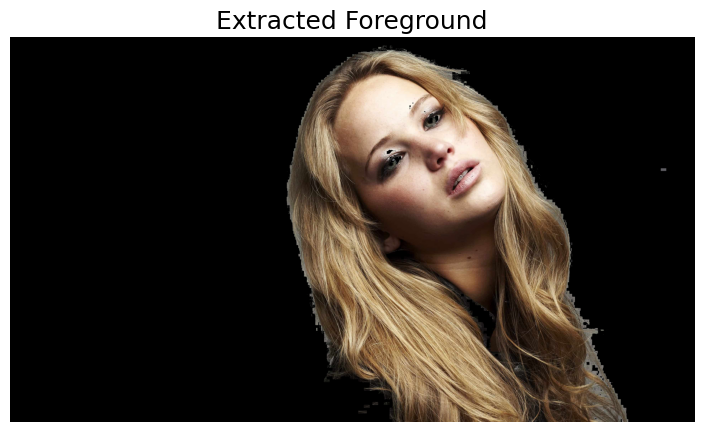

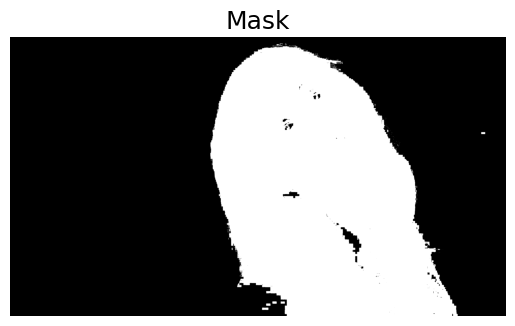

In [6]:
_, mask = cv.threshold(S, 12, 255, cv.THRESH_BINARY)
foreground = cv.bitwise_and(jeniffer, jeniffer, mask=mask)

# Display the extracted foreground
plt.figure(figsize=(10, 5))

plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground', fontsize=18)
plt.axis('off')
plt.show()

plt.imshow(mask, cmap='gray')
plt.title('Mask', fontsize=18)
plt.axis('off')
plt.show()

In [8]:
v_fg = V[mask > 0]
hist_fg, _ = np.histogram(v_fg, bins=256, range=(0,256))

In [12]:
cdf = np.cumsum(hist_fg)
# normalize CDF to [0,1], guard against empty mask
if cdf[-1] == 0:
    raise ValueError("Mask selected zero pixels; adjust the threshold for S.")
cdf_norm = cdf / float(cdf[-1])

lut = np.round(255 * cdf_norm).astype(np.uint8)  # length 256

V_eq = V.copy()
V_eq[mask > 0] = lut[V[mask > 0]]  # apply only to foreground pixels

hsv_eq = cv.merge([H, S, V_eq])
bgr_eq_all = cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR)


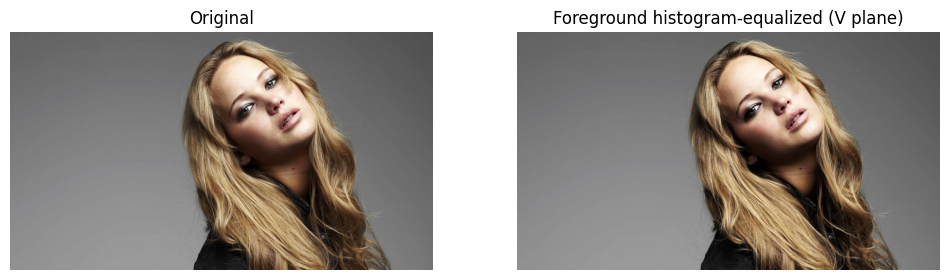

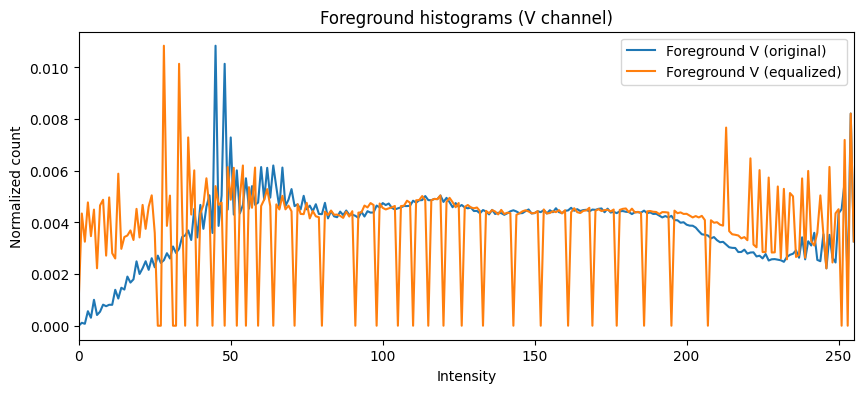

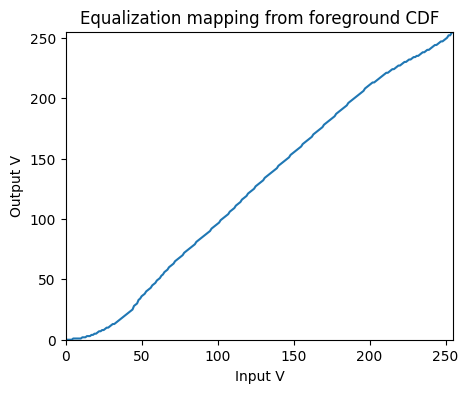

In [13]:
bg_mask = cv.bitwise_not(mask)
background = cv.bitwise_and(jeniffer, jeniffer, mask=bg_mask)
foreground_eq = cv.bitwise_and(bgr_eq_all, bgr_eq_all, mask=mask)
result = cv.add(background, foreground_eq)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(rgb_image);            plt.title('Original'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Foreground histogram-equalized (V plane)'); plt.axis('off')
plt.show()


v_fg_eq = V_eq[mask > 0]
hist_fg_eq, _ = np.histogram(v_fg_eq, bins=256, range=(0,256))

xs = np.arange(256)
plt.figure(figsize=(10,4))
plt.plot(xs, hist_fg / hist_fg.sum(), label='Foreground V (original)')
plt.plot(xs, hist_fg_eq / hist_fg_eq.sum(), label='Foreground V (equalized)')
plt.xlim(0,255); plt.title('Foreground histograms (V channel)'); plt.legend()
plt.xlabel('Intensity'); plt.ylabel('Normalized count')
plt.show()


plt.figure(figsize=(5,4))
plt.plot(xs, lut)
plt.xlim(0,255); plt.ylim(0,255)
plt.title('Equalization mapping from foreground CDF')
plt.xlabel('Input V'); plt.ylabel('Output V')
plt.show()